In [198]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
dados = pd.read_csv('/content/SISMIGRA_REGISTROS_ATIVOS_2022_02.csv', sep=';')

In [200]:
dados.shape

(5538, 4)

In [201]:
dados.head()

,UF,NACIONALIDADE,CLASSIFICACAO,QTD
0,PR,COLÔMBIA,Temporário,884
1,PR,URUGUAI,Residente,931
2,PR,HAITI,Residente,16194
3,PR,ESPANHA,Residente,1409
4,PR,CONGO,Residente,70


In [202]:
dados['QTD'].sum()

1379845

In [203]:
dados.isnull().sum()

UF               0
NACIONALIDADE    0
CLASSIFICACAO    0
QTD              0
dtype: int64

In [204]:
dados.describe()

,QTD
count,5538.000000
mean,249.159444
std,2388.011249
min,1.000000
25%,2.000000
50%,5.000000
75%,29.000000
max,83978.000000


In [205]:
dadosms = dados.loc[dados['UF'] == 'MS'].sort_values('QTD', ascending=False)
dadosms

,UF,NACIONALIDADE,CLASSIFICACAO,QTD
3602,MS,PARAGUAI,Residente,6107
3605,MS,VENEZUELA,Temporário,3925
3603,MS,BOLÍVIA,Residente,2413
3608,MS,HAITI,Residente,1750
3601,MS,VENEZUELA,Residente,1325
...,...,...,...,...
3742,MS,REPÚBLICA DEMOCRÁTICA DO CONGO,Temporário,1
3743,MS,MÉXICO,Provisório,1
3744,MS,VIETINA,Residente,1
3746,MS,JORDÂNIA,Provisório,1


In [206]:
dadosms['QTD'].sum()

23788

In [207]:
dadosms['%'] = (100 * dadosms['QTD'])/ dadosms['QTD'].sum()

In [208]:
dadosms

,UF,NACIONALIDADE,CLASSIFICACAO,QTD,%
3602,MS,PARAGUAI,Residente,6107,25.672608
3605,MS,VENEZUELA,Temporário,3925,16.499916
3603,MS,BOLÍVIA,Residente,2413,10.143770
3608,MS,HAITI,Residente,1750,7.356650
3601,MS,VENEZUELA,Residente,1325,5.570035
...,...,...,...,...,...
3742,MS,REPÚBLICA DEMOCRÁTICA DO CONGO,Temporário,1,0.004204
3743,MS,MÉXICO,Provisório,1,0.004204
3744,MS,VIETINA,Residente,1,0.004204
3746,MS,JORDÂNIA,Provisório,1,0.004204


In [209]:
dadosms.loc[dadosms['NACIONALIDADE'] == 'VENEZUELA']

,UF,NACIONALIDADE,CLASSIFICACAO,QTD,%
3605,MS,VENEZUELA,Temporário,3925,16.499916
3601,MS,VENEZUELA,Residente,1325,5.570035
3600,MS,VENEZUELA,Provisório,333,1.399865


In [210]:
dadosms.loc[dadosms['NACIONALIDADE'] == 'PARAGUAI']

,UF,NACIONALIDADE,CLASSIFICACAO,QTD,%
3602,MS,PARAGUAI,Residente,6107,25.672608
3628,MS,PARAGUAI,Temporário,1168,4.910039
4285,MS,PARAGUAI,Fronteiriço,381,1.601648
4288,MS,PARAGUAI,Provisório,1,0.004204


In [211]:
dadosms.loc[dadosms['NACIONALIDADE'] == 'HAITI']

,UF,NACIONALIDADE,CLASSIFICACAO,QTD,%
3608,MS,HAITI,Residente,1750,7.356650
3609,MS,HAITI,Temporário,794,3.337817
3684,MS,HAITI,Provisório,6,0.025223


In [212]:
agrupadoms = dadosms.groupby(dadosms['NACIONALIDADE']).sum().sort_values('QTD', ascending=False)
agrupadoms

,QTD,%
NACIONALIDADE,,
PARAGUAI,7657,32.188498
VENEZUELA,5583,23.469817
BOLÍVIA,2760,11.602489
HAITI,2550,10.719691
JAPÃO,857,3.602657
...,...,...
RUANDA,1,0.004204
MAURÍCIO,1,0.004204
NICARÁGUA,1,0.004204


In [213]:
top20ms = agrupadoms.head(20)
top20ms

,QTD,%
NACIONALIDADE,,
PARAGUAI,7657,32.188498
VENEZUELA,5583,23.469817
BOLÍVIA,2760,11.602489
HAITI,2550,10.719691
JAPÃO,857,3.602657
PORTUGAL,654,2.749285
CHINA,479,2.013620
COLÔMBIA,418,1.757188
LÍBANO,319,1.341012


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


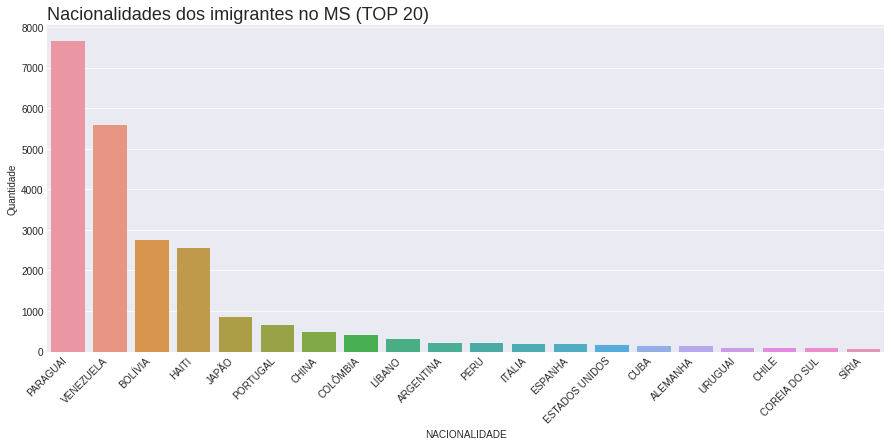

In [214]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-darkgrid')
plt.title('Nacionalidades dos imigrantes no MS (TOP 20)', fontsize=18, loc='left')
sns.barplot(top20ms.index, top20ms['QTD'])
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


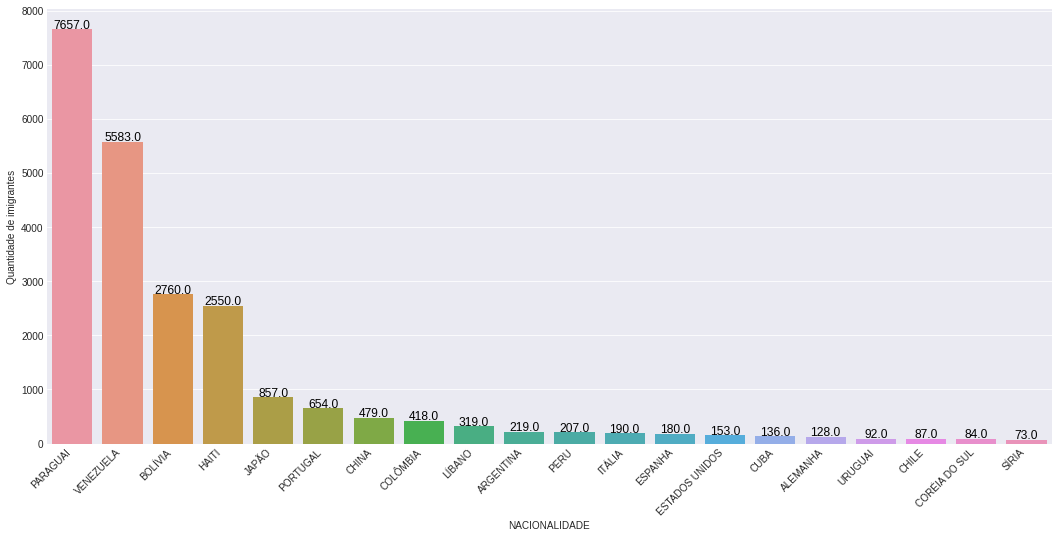

In [215]:
plt.figure(figsize=(18,8))
teste1 = sns.barplot(top20ms.index, top20ms['QTD'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Quantidade de imigrantes')
for c in teste1.patches:
  teste1.annotate(c.get_height(),
                  (c.get_x() + c.get_width() / 2, c.get_height()),
                  ha='center', va='baseline', fontsize=12, color='black',
                  xytext=(0, 1), textcoords='offset points'
                  )
#xytest = (eixoX, eixoY)
#se usou esse de cima, é comum usar o textcoords para informar o parametro.

In [216]:
#a ideia acima era o de repassar para dentro do gráfico os valores individuais de cada barra. A imagem ficou levemente mais poluida
#para isso ocorrer, toda a expressao usada para montar o gráfico, no caso, "sns.barplot", foi repassada dentro de uma variável, "teste1"
#feito isso, foi usado um for em cima dessa variavel juntamente com o "patches" e os respectivos parâmetros

In [217]:
#Imigrantes em SP

In [218]:
dadossp = dados.loc[dados['UF'] == 'SP'].sort_values('QTD', ascending=False)
dadossp

,UF,NACIONALIDADE,CLASSIFICACAO,QTD
294,SP,BOLÍVIA,Residente,83978
257,SP,PORTUGAL,Residente,78742
250,SP,JAPÃO,Residente,41635
260,SP,CHINA,Residente,35522
252,SP,ITÁLIA,Residente,25641
...,...,...,...,...
625,SP,KUAITE,Temporário,1
623,SP,SANTA LÚCIA,Temporário,1
622,SP,ESLOVÊNIA,Provisório,1
442,SP,BOTSUANA,Residente,1


In [219]:
dadossp.groupby(['CLASSIFICACAO']).sum().sort_values('QTD', ascending=False)

,QTD
CLASSIFICACAO,
Residente,509598
Temporário,35149
Provisório,7711
Fronteiriço,1


In [220]:
dadossp['QTD'].sum()

552459

In [221]:
dadossp['%'] = (100 * dadossp['QTD'])/ dadossp['QTD'].sum()
dadossp

,UF,NACIONALIDADE,CLASSIFICACAO,QTD,%
294,SP,BOLÍVIA,Residente,83978,15.200766
257,SP,PORTUGAL,Residente,78742,14.253003
250,SP,JAPÃO,Residente,41635,7.536306
260,SP,CHINA,Residente,35522,6.429798
252,SP,ITÁLIA,Residente,25641,4.641249
...,...,...,...,...,...
625,SP,KUAITE,Temporário,1,0.000181
623,SP,SANTA LÚCIA,Temporário,1,0.000181
622,SP,ESLOVÊNIA,Provisório,1,0.000181
442,SP,BOTSUANA,Residente,1,0.000181


In [222]:
somadadossp = dadossp.groupby('NACIONALIDADE').sum()
somadadossp

,QTD,%
NACIONALIDADE,,
AFEGANISTÃO,164,0.029685
AFRICA DO SUL,394,0.071318
ALBÂNIA,27,0.004887
ALEMANHA,11119,2.012638
ANDORRA,4,0.000724
...,...,...
VIETINA,69,0.012490
VIETNAM DO NORTE,14,0.002534
ZIMBÁBUE,21,0.003801


In [223]:
dadossp.loc[dados['NACIONALIDADE'] == 'eritréia']

,UF,NACIONALIDADE,CLASSIFICACAO,QTD,%
475,SP,eritréia,Residente,2,0.000362


In [224]:
dadossp.loc[dados['NACIONALIDADE'] == 'ANDORRA']

,UF,NACIONALIDADE,CLASSIFICACAO,QTD,%
522,SP,ANDORRA,Residente,4,0.000724


In [225]:
somasp = somadadossp.sort_values('QTD', ascending=False)
somasp

,QTD,%
NACIONALIDADE,,
BOLÍVIA,88573,16.032502
PORTUGAL,78947,14.290110
JAPÃO,42011,7.604365
CHINA,37005,6.698235
HAITI,35396,6.406991
...,...,...
"ANTARTICO BRITANICO,TERRITORIO",1,0.000181
TURCAS E CAICOS,1,0.000181
ANTÍGUA,1,0.000181


In [226]:
top20sp = somasp.head(20)
top20sp

,QTD,%
NACIONALIDADE,,
BOLÍVIA,88573,16.032502
PORTUGAL,78947,14.290110
JAPÃO,42011,7.604365
CHINA,37005,6.698235
HAITI,35396,6.406991
ITÁLIA,25831,4.675641
ESPANHA,23467,4.247736
ARGENTINA,21260,3.848249
VENEZUELA,18682,3.381608


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


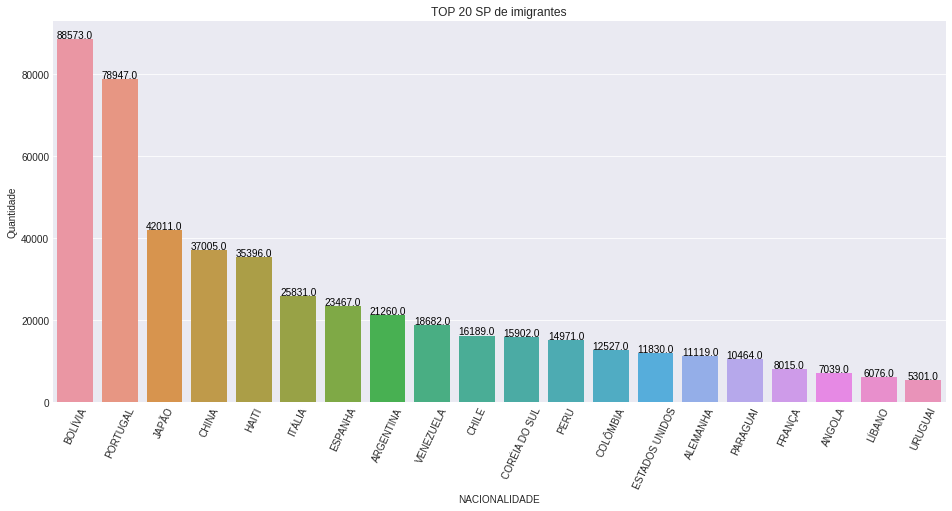

In [227]:
plt.figure(figsize=(16,7))
plt.title('TOP 20 SP de imigrantes')
plotado = sns.barplot(top20sp.index, top20sp['QTD'])
for c in plotado.patches:
  plotado.annotate(c.get_height(),
                   (c.get_x() + c.get_width()/ 2, + c.get_height()),
                   ha='center', va='baseline', color='black', fontsize=10,
                   xytext=(0, 1), textcoords='offset points'
                   )
plt.ylabel('Quantidade')
plt.xticks(rotation=65)
plt.show()

In [228]:
#ver, quanto cada estado recebeu de imigrantes

In [229]:
totalporestado = dados.groupby('UF').sum().sort_values('QTD', ascending=False)
totalporestado

,QTD
UF,
SP,552459
RJ,168509
PR,100620
RS,93088
RR,91426
SC,84923
AM,45832
MG,41225
BA,29040


In [230]:
totalporestado.duplicated()

UF
SP    False
RJ    False
PR    False
RS    False
RR    False
SC    False
AM    False
MG    False
BA    False
MS    False
DF    False
CE    False
MT    False
GO    False
PE    False
PA    False
RO    False
RN    False
ES    False
PF    False
MA    False
PB    False
AL    False
AC    False
SE    False
PI    False
AP    False
TO    False
--    False
dtype: bool

In [231]:
totalporestado['Rank'] = totalporestado['QTD'].rank(method='min', ascending=False)

In [232]:
totalporestado

,QTD,Rank
UF,,
SP,552459,1.0
RJ,168509,2.0
PR,100620,3.0
RS,93088,4.0
RR,91426,5.0
SC,84923,6.0
AM,45832,7.0
MG,41225,8.0
BA,29040,9.0


In [233]:
totalporestado['Rank'] = totalporestado['Rank'].astype(str)

In [234]:
totalporestado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, SP to --
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   QTD     29 non-null     int64 
 1   Rank    29 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [235]:
totalporestado['Rank'] = totalporestado['Rank'].apply(lambda linha: linha.replace('.0', ''))
totalporestado

,QTD,Rank
UF,,
SP,552459,1
RJ,168509,2
PR,100620,3
RS,93088,4
RR,91426,5
SC,84923,6
AM,45832,7
MG,41225,8
BA,29040,9


In [236]:
#totalporestado.drop(columns=['Rank'])
#totalporestado = totalporestado.set_index('Rank')

In [237]:
totalporestado.head()

,QTD,Rank
UF,,
SP,552459,1
RJ,168509,2
PR,100620,3
RS,93088,4
RR,91426,5


In [238]:
dados.isna().sum()

UF               0
NACIONALIDADE    0
CLASSIFICACAO    0
QTD              0
dtype: int64

In [239]:
semestado = dados.loc[dados['UF'] == '--'].sort_values('QTD', ascending=False)
semestado

,UF,NACIONALIDADE,CLASSIFICACAO,QTD
5183,--,PORTUGAL,Residente,45
5180,--,JAPÃO,Residente,32
5179,--,CHINA,Residente,31
5197,--,GANA,Residente,23
5186,--,ARGENTINA,Residente,23
...,...,...,...,...
5200,--,BÉLGICA,Residente,1
5199,--,NORUEGA,Residente,1
5194,--,TURQUIA,Residente,1
5184,--,SANTA LÚCIA,Residente,1


In [240]:
semestado['QTD'].sum()

437

In [248]:
dadospf = dados.loc[dados['UF'] == 'PF']
dadospf

,UF,NACIONALIDADE,CLASSIFICACAO,QTD
4590,PF,SERVIA E MONTENEGRO,Residente,48
4591,PF,JAPÃO,Residente,616
4592,PF,ESPANHA,Residente,569
4593,PF,PORTUGAL,Residente,1523
4594,PF,MALTA,Residente,1
...,...,...,...,...
4672,PF,JAMAICA,Residente,1
4673,PF,"TREGUA, ESTADO",Residente,1
5369,PF,ESTADOS UNIDOS,Fronteiriço,1
5370,PF,IRAQUE,Residente,1


In [250]:
dadospf = dadospf.sort_values('QTD', ascending=False)
dadospf

,UF,NACIONALIDADE,CLASSIFICACAO,QTD
4593,PF,PORTUGAL,Residente,1523
4591,PF,JAPÃO,Residente,616
4592,PF,ESPANHA,Residente,569
4595,PF,ITÁLIA,Residente,492
4597,PF,ALEMANHA,Residente,242
...,...,...,...,...
4655,PF,ARÁBIA SAUDITA,Residente,1
4653,PF,TERRIT. BRIT. DO OCEANO INDICO,Residente,1
4645,PF,COSTA DO MARFIM,Residente,1
4647,PF,SUAZILÂNDIA,Residente,1


In [252]:
dadospf['CLASSIFICACAO'].unique()

array(['Residente', 'Fronteiriço'], dtype=object)

In [251]:
dadospf.groupby('CLASSIFICACAO').sum()

,QTD
CLASSIFICACAO,
Fronteiriço,1
Residente,5114


In [241]:
#437 pessoas nao estão com os estados definidos pelo sistema da policia federal

In [242]:
#ver como esta o processo migratória em roraima

In [255]:
dadosRR = dados.loc[dados['UF'] == 'RR'].sort_values('QTD', ascending=False)
dadosRR

,UF,NACIONALIDADE,CLASSIFICACAO,QTD
4677,RR,VENEZUELA,Temporário,41682
4676,RR,VENEZUELA,Provisório,24222
4674,RR,VENEZUELA,Residente,22679
4683,RR,HAITI,Residente,270
4681,RR,HAITI,Temporário,253
...,...,...,...,...
4739,RR,SAO TOMÉ E PRÍNCIPE,Residente,1
4787,RR,BOLÍVIA,Temporário,1
4788,RR,GANA,Provisório,1
4791,RR,BENIN,Provisório,1


In [258]:
dadosRR['QTD'].sum()

91426

In [259]:
dadosRR['%'] = (100 * dadosRR['QTD'])/ dadosRR['QTD'].sum()
dadosRR

,UF,NACIONALIDADE,CLASSIFICACAO,QTD,%
4677,RR,VENEZUELA,Temporário,41682,45.590970
4676,RR,VENEZUELA,Provisório,24222,26.493558
4674,RR,VENEZUELA,Residente,22679,24.805854
4683,RR,HAITI,Residente,270,0.295321
4681,RR,HAITI,Temporário,253,0.276727
...,...,...,...,...,...
4739,RR,SAO TOMÉ E PRÍNCIPE,Residente,1,0.001094
4787,RR,BOLÍVIA,Temporário,1,0.001094
4788,RR,GANA,Provisório,1,0.001094
4791,RR,BENIN,Provisório,1,0.001094


In [261]:
dadosRR.groupby('NACIONALIDADE').sum().sort_values('QTD', ascending=False)

,QTD,%
NACIONALIDADE,,
VENEZUELA,88674,96.989915
HAITI,552,0.603767
COLÔMBIA,360,0.393761
CUBA,338,0.369698
PERU,261,0.285477
...,...,...
PAÍSES BAIXOS,1,0.001094
GABÃO,1,0.001094
PANAMÁ,1,0.001094


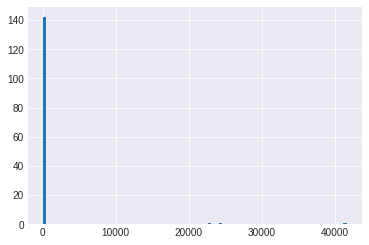

In [268]:
plt.hist(dadosRR['QTD'],bins=83);